In [83]:
import pandas as pd # for dataframe operations
import seaborn as sns # visualization
import matplotlib.pyplot as plt
import numpy as np


In [84]:
df = pd.read_excel("DS - Assignment Part 1 data set.xlsx") # read data

In [85]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


There is no missing data in dataset

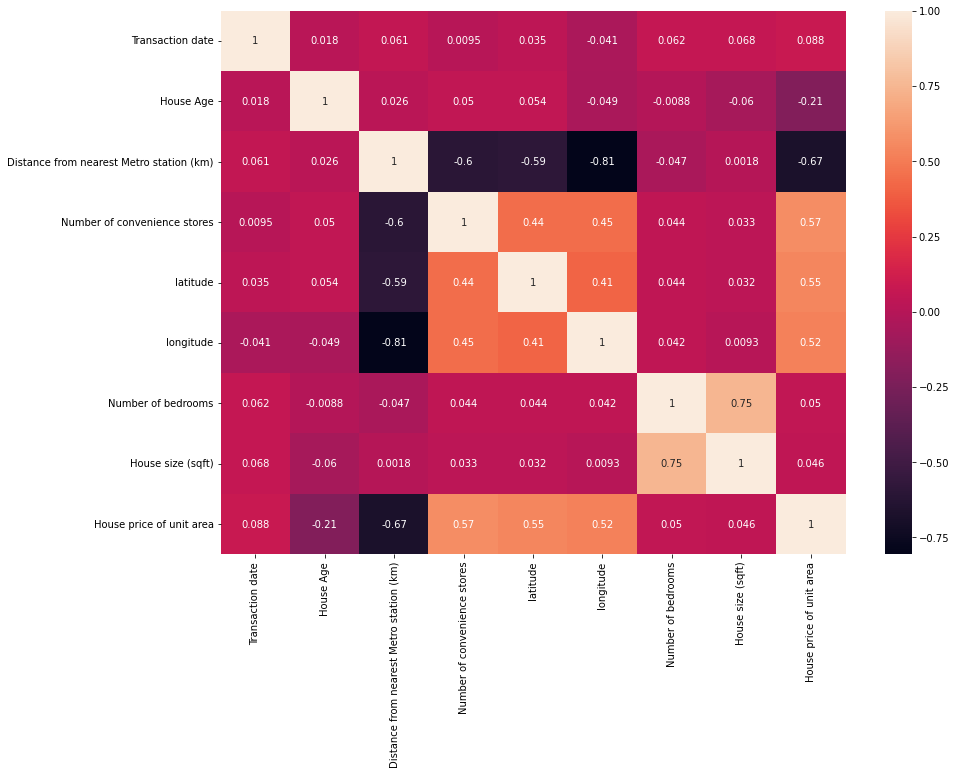

In [87]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True) # to check correlation between variables

Since from heatmap we can see that Transaction has no correlation with house price

In [88]:
df.drop(columns=["Transaction date"], inplace= True)

In [89]:
df.corr().iloc[:,-1]

House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

Text(0.5, 1.0, 'Positively correlated')

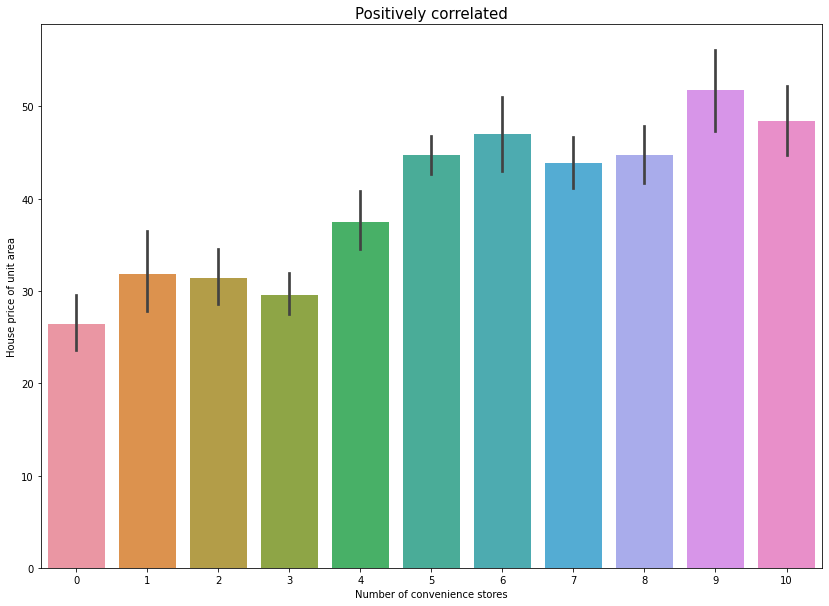

In [90]:
#visulizing some of the data
plt.figure(figsize=(14,10))
sns.barplot(data=df, x="Number of convenience stores", y="House price of unit area")
plt.title("Positively correlated",fontsize=15)

Text(0.5, 1.0, 'Negatively correlated')

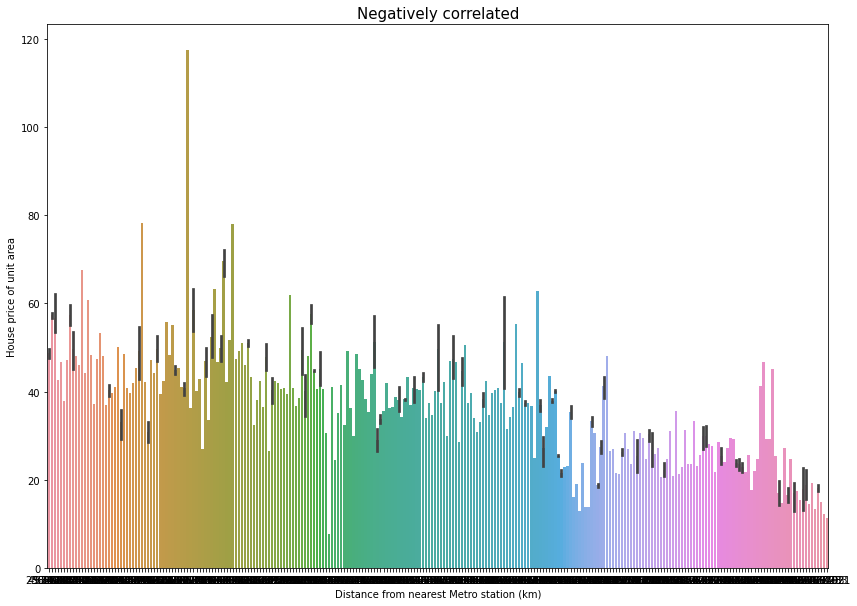

In [91]:
plt.figure(figsize=(14,10))
sns.barplot(data=df, x="Distance from nearest Metro station (km)", y="House price of unit area")
plt.title("Negatively correlated",fontsize=15)

In [92]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [93]:
X

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,24.98298,121.54024,1,575
1,19.5,306.59470,9,24.98034,121.53951,2,1240
2,13.3,561.98450,5,24.98746,121.54391,3,1060
3,13.3,561.98450,5,24.98746,121.54391,2,875
4,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803
410,5.6,90.45606,9,24.97433,121.54310,2,1278
411,18.8,390.96960,7,24.97923,121.53986,1,503
412,8.1,104.81010,5,24.96674,121.54067,1,597


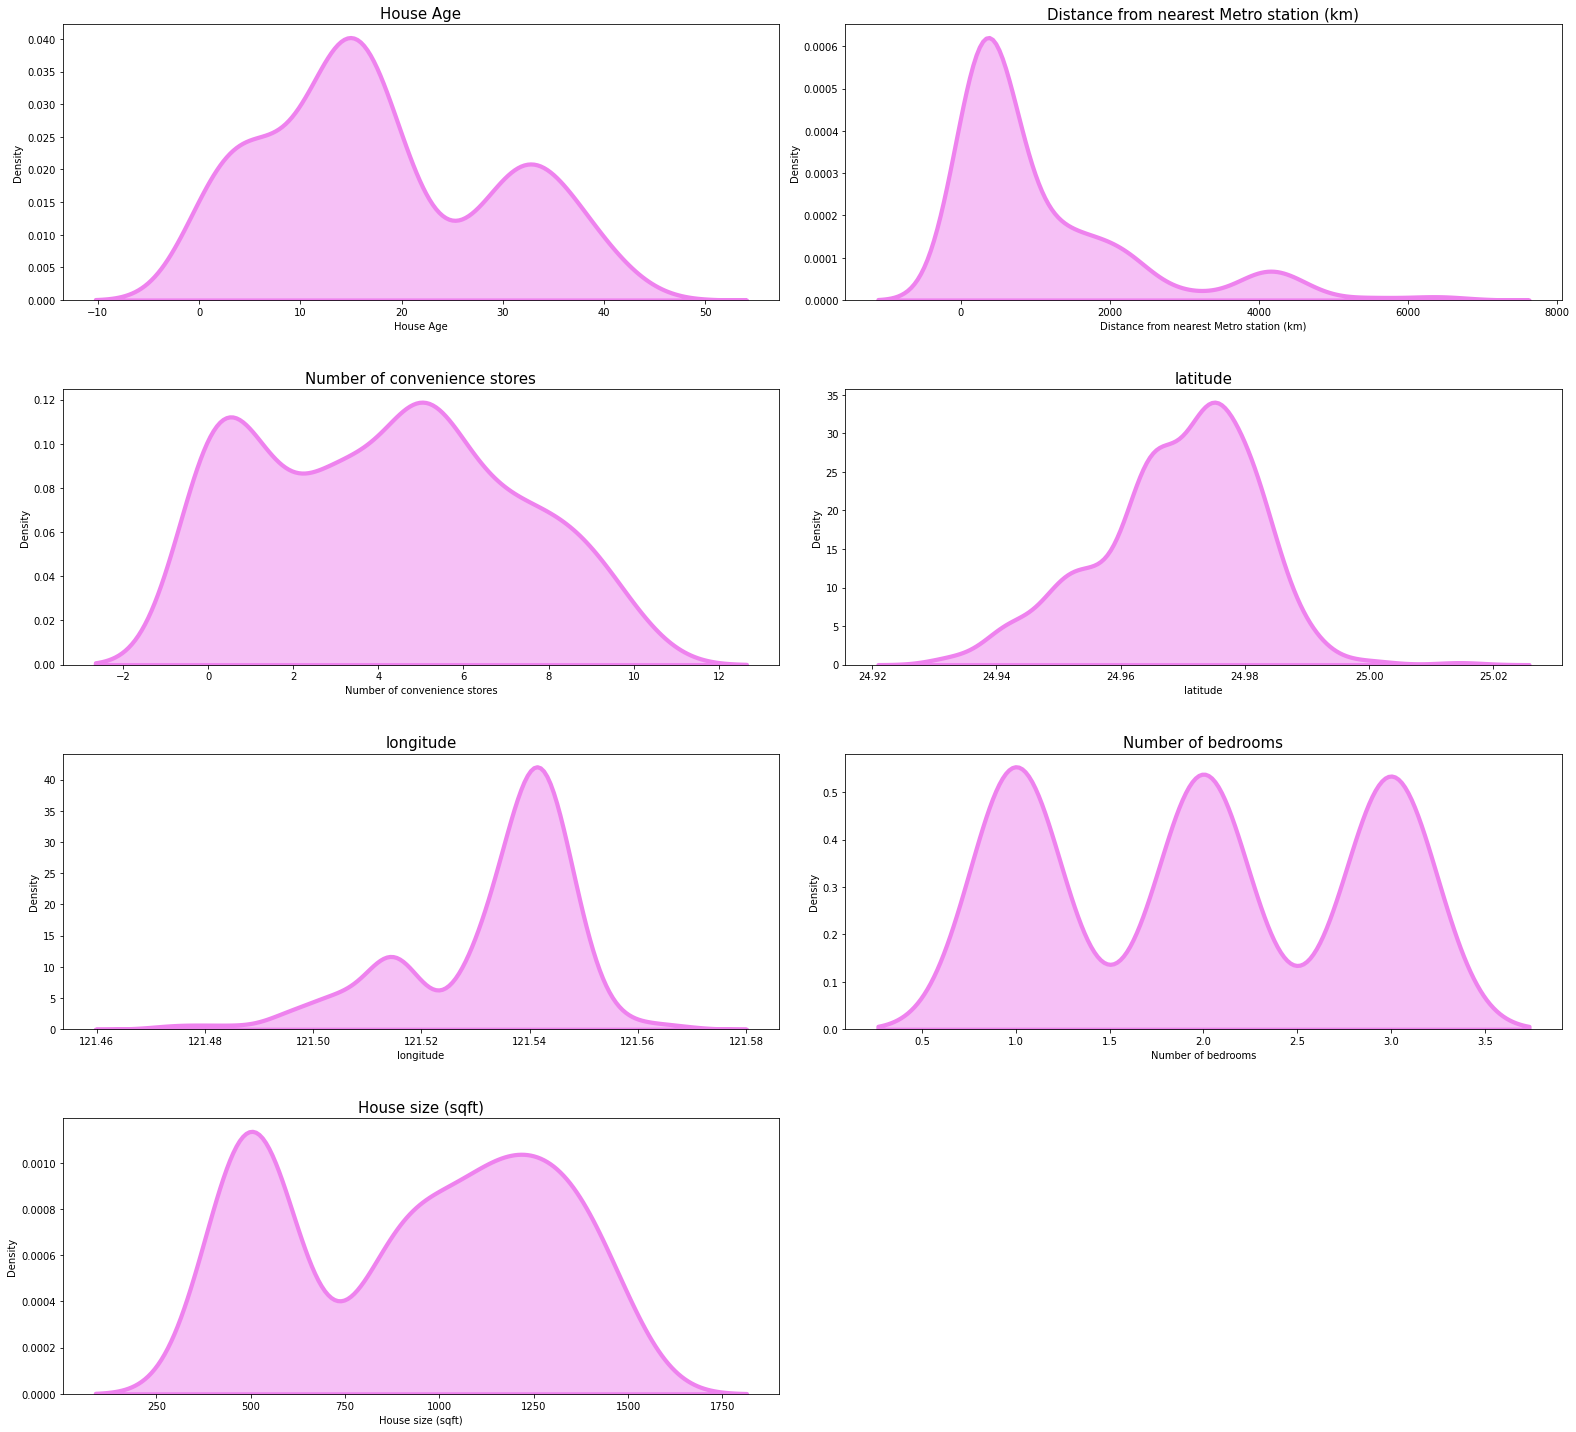

In [94]:
#check the normality 
plt.figure(figsize=(22,20))
a = 1
for i in X.columns:
    plt.subplot(4,2,a)
    plt.title(i,fontsize=15)
    sns.kdeplot(df[i],shade=True, alpha=.5, linewidth=4.2,color="violet")
    a+=1
    plt.tight_layout(h_pad=4)

## **Since data is not normalize, we have to make it normalize using MinMaxScaler**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

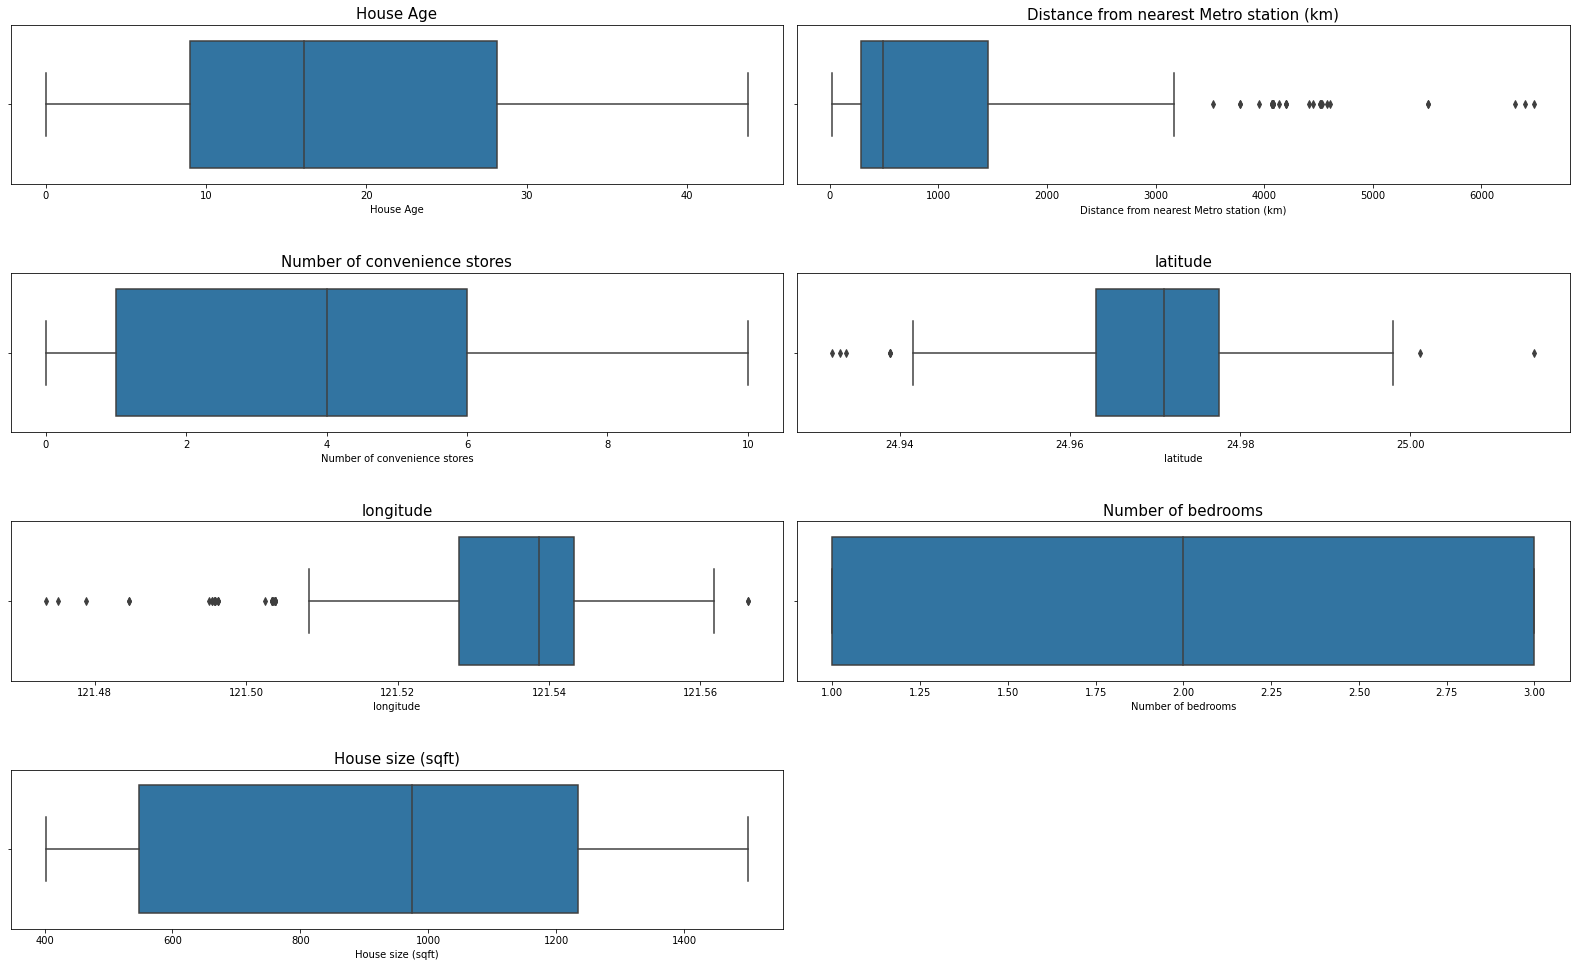

In [95]:
# To see any outliers present in dataaset
plt.figure(figsize=(22,20))
a = 1
for i in X.columns:
    plt.subplot(6,2,a)
    plt.title(i,fontsize=15) # title 
    sns.boxplot(df[i])  # boxplot
    a+=1
    plt.tight_layout(h_pad=4)

Most of the columns has outliers 

In [96]:
# Check for outliers using boxplots
# Replace that with MEAN

for i in X.columns:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(X[i], [75,25])
    MEAN = X[i].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    X.loc[X[i]< minimum,i] = MEAN
    X.loc[X[i]> maximum,i] = MEAN

## **MinmaxScaler**

In [97]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6
0,0.730594,0.019535,1.0,0.733924,0.597905,0.0,0.157559
1,0.445205,0.089967,0.9,0.687157,0.584253,0.5,0.763206
2,0.303653,0.171096,0.5,0.813286,0.666542,1.0,0.599271
3,0.303653,0.171096,0.5,0.813286,0.666542,0.5,0.430783
4,0.114155,0.116643,0.5,0.669973,0.639237,0.0,0.081056
...,...,...,...,...,...,...,...
409,0.312785,0.336887,0.0,0.000000,0.469255,1.0,0.365209
410,0.127854,0.021307,0.9,0.580691,0.651393,0.5,0.797814
411,0.429224,0.116770,0.7,0.667493,0.590799,0.0,0.091985
412,0.184932,0.025867,0.5,0.446236,0.605947,0.0,0.177596


# Train test split

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [99]:
X_train

,0,1,2,3,4,5,6
302,0.376712,0.719399,0.3,0.306466,0.099495,1.0,0.593807
20,0.102740,0.715544,0.3,0.382462,0.060595,0.5,0.988160
303,0.874429,0.132254,0.0,0.532507,0.485506,0.5,0.675774
142,0.452055,0.196072,0.5,0.506997,0.714419,0.0,0.040984
14,0.301370,0.362603,0.4,0.885917,0.482327,0.0,0.100182
...,...,...,...,...,...,...,...
323,0.652968,0.055195,0.6,0.615766,0.674958,0.0,0.174863
192,1.000000,0.010866,0.7,0.459699,0.606321,1.0,0.544627
117,0.310502,0.336887,0.0,0.486804,0.469255,1.0,0.733151
47,0.819635,0.196114,0.3,0.603720,0.540116,1.0,0.423497


In [100]:
y_train

302    23.2
20     29.3
303    38.4
142    37.5
14     34.3
       ... 
323    42.5
192    42.7
117    13.0
47     61.5
172    58.1
Name: House price of unit area, Length: 331, dtype: float64

## **Modeling**

In [106]:
#@title Default title text
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error



models = [["linear regression :" ,LinearRegression()],
          ["Decision tree regressor :",DecisionTreeRegressor()],
          ["SVR :", SVR()],
          ["KNeighbors regressor :" ,KNeighborsRegressor()],
          ["Random forest regressor ", RandomForestRegressor()],
          ["XG boost regressor", XGBRegressor()]]

scores = []
for name,model in models:
  model.fit(X_train,y_train)
  error = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
  score = r2_score(y_test,model.predict(X_test)) 
  scores.append((name , "Mean square error", error,"R2 score :",score))




[11:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [107]:
scores

[('linear regression :',
  'Mean square error',
  7.774721512648157,
  'R2 score :',
  0.6520055377207548),
 ('Decision tree regressor :',
  'Mean square error',
  12.08540890635211,
  'R2 score :',
  0.15913679658201807),
 ('SVR :',
  'Mean square error',
  8.503398065678256,
  'R2 score :',
  0.5837179644939112),
 ('KNeighbors regressor :',
  'Mean square error',
  8.72868419126522,
  'R2 score :',
  0.561368102038045),
 ('Random forest regressor ',
  'Mean square error',
  7.193206120302451,
  'R2 score :',
  0.7021156688251209),
 ('XG boost regressor',
  'Mean square error',
  6.909547070962441,
  'R2 score :',
  0.7251461598802029)]

## **Final model**

In [108]:
final = XGBRegressor()
model = final.fit(X_train,y_train)

[11:55:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
# get importance
importance = model.feature_importances_

In [113]:
imp_features = pd.DataFrame(importance,
                                   index = df.iloc[:,:-1].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
imp_features = imp_features.reset_index()
imp_features

,index,importance
0,Distance from nearest Metro station (km),0.566392
1,latitude,0.106073
2,House Age,0.104943
3,Number of bedrooms,0.082751
4,longitude,0.061789
5,Number of convenience stores,0.044197
6,House size (sqft),0.033855


# Important Features recognized by XGB regressor

Text(0.5, 1.0, 'Important features')

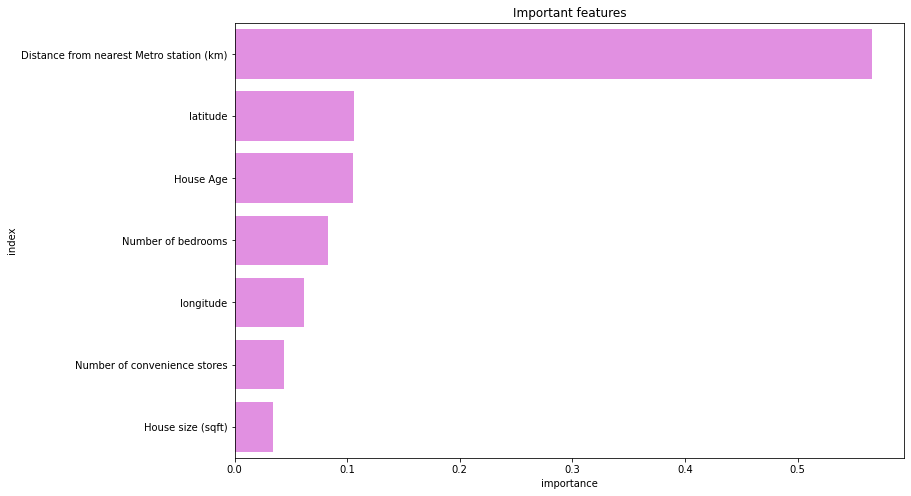

In [114]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Plot the Feature Importances

sns.barplot(x="importance", y="index", data=imp_features.iloc[:20,:],
            label="Total", color="violet")
plt.title('Important features')

## **So distance from metro is highly matter for price predictions and from above all models XGB regressor gives high score and suitable for house price predictions**